In [1]:
# ================================================================
# 🧠 Handwritten Digit Recognition using Support Vector Machine (SVM)
# ================================================================

# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# ================================================================
# 1️⃣ Load the MNIST Dataset
# ================================================================
digits = datasets.load_digits()

print("Dataset shape:", digits.data.shape)
print("Number of classes:", len(np.unique(digits.target)))

Dataset shape: (1797, 64)
Number of classes: 10


In [3]:
# ================================================================
# 2️⃣ Split the Data into Train and Test Sets
# ================================================================
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.2, random_state=42
)

In [4]:
# ================================================================
# 3️⃣ Data Normalization
# ================================================================
# SVM performs better with normalized features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# ================================================================
# 4️⃣ Train a Base SVM Model
# ================================================================
svm_clf = SVC(kernel='rbf', C=1)
svm_clf.fit(X_train_scaled, y_train)
y_pred = svm_clf.predict(X_test_scaled)


🎯 Base Model Performance:
Accuracy: 0.9805555555555555

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       0.96      1.00      0.98        46
           5       0.96      0.98      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.94      0.97        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



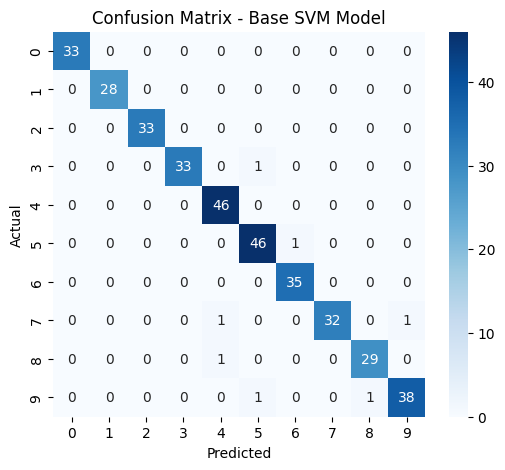

In [6]:
# ================================================================
# 5️⃣ Evaluate Model Performance
# ================================================================
print("\n🎯 Base Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Base SVM Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [7]:
# ================================================================
# 6️⃣ Hyperparameter Tuning using GridSearchCV
# ================================================================
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly']
}

grid = GridSearchCV(SVC(), param_grid, cv=3, scoring='accuracy', verbose=2)
grid.fit(X_train_scaled, y_train)

print("\n✅ Best Parameters:", grid.best_params_)
print("Best Accuracy on Training Data:", grid.best_score_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.1s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, ke

In [8]:
# ================================================================
# 7️⃣ Evaluate the Best Model
# ================================================================
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

print("\n🎯 Tuned Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report (Precision & Recall):")
print(classification_report(y_test, y_pred_best))


🎯 Tuned Model Performance:
Accuracy: 0.9861111111111112

Classification Report (Precision & Recall):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       1.00      1.00      1.00        35
           7       1.00      0.97      0.99        34
           8       0.94      1.00      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



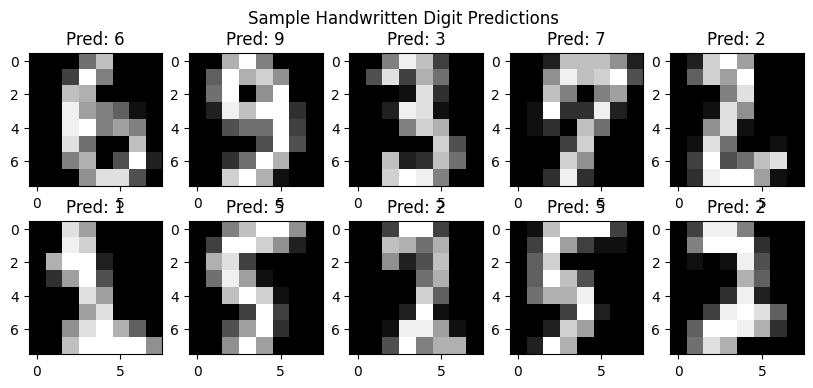

In [9]:
# ================================================================
# 8️⃣ Visualize Sample Predictions
# ================================================================
plt.figure(figsize=(10, 4))
for index, (image, prediction) in enumerate(zip(X_test[0:10], y_pred_best[0:10])):
    plt.subplot(2, 5, index + 1)
    plt.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.gray)
    plt.title(f"Pred: {prediction}")
plt.suptitle("Sample Handwritten Digit Predictions")
plt.show()